In [10]:
import kaggle
import pandas as pd
import numpy as np
import zipfile
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics 
from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KDTree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

In [11]:
df = pd.read_csv('df_clean.csv')

In [12]:
# Anzahl der Studenten pro Kurs
num_students = df['Course'].value_counts()

# Durchschnittliche Abschlussrate pro Kurs
course_graduates = df.groupby('Course')['Target_Graduate'].mean()

# Durchschnittliche Dropout-Rate pro Kurs
course_dropouts = df.groupby('Course')['Target_Dropout'].mean()

# Durchschnittliche Dropout-Rate pro Kurs
course_enrolled = df.groupby('Course')['Target_Enrolled'].mean()

# Series zu einem DataFrame kombinieren
combined_df = pd.concat([num_students, course_dropouts, course_graduates, course_enrolled], axis=1)

# Spaltennamen setzen
combined_df.columns = ['Num_Students', 'Dropout_Rate', 'Graduate_Rate', 'Enrolled_Rate']

print(combined_df)

      Num_Students  Dropout_Rate  Graduate_Rate  Enrolled_Rate
9500         11997      0.132450       0.775611       0.091940
9773          8083      0.218112       0.685142       0.096746
9238          7783      0.187588       0.673262       0.139149
9147          7574      0.326644       0.283866       0.389490
9254          5312      0.364458       0.377636       0.257907
9085          5290      0.317391       0.426087       0.256522
9670          4684      0.333476       0.436593       0.229932
9991          3527      0.593989       0.208959       0.197051
9003          3434      0.511939       0.286255       0.201805
9070          3245      0.206163       0.644068       0.149769
9853          3143      0.358256       0.284760       0.356984
9119          2917      0.588618       0.050737       0.360644
171           2852      0.712132       0.214937       0.072931
8014          1873      0.413241       0.482648       0.104111
9130          1565      0.535463       0.232588       0

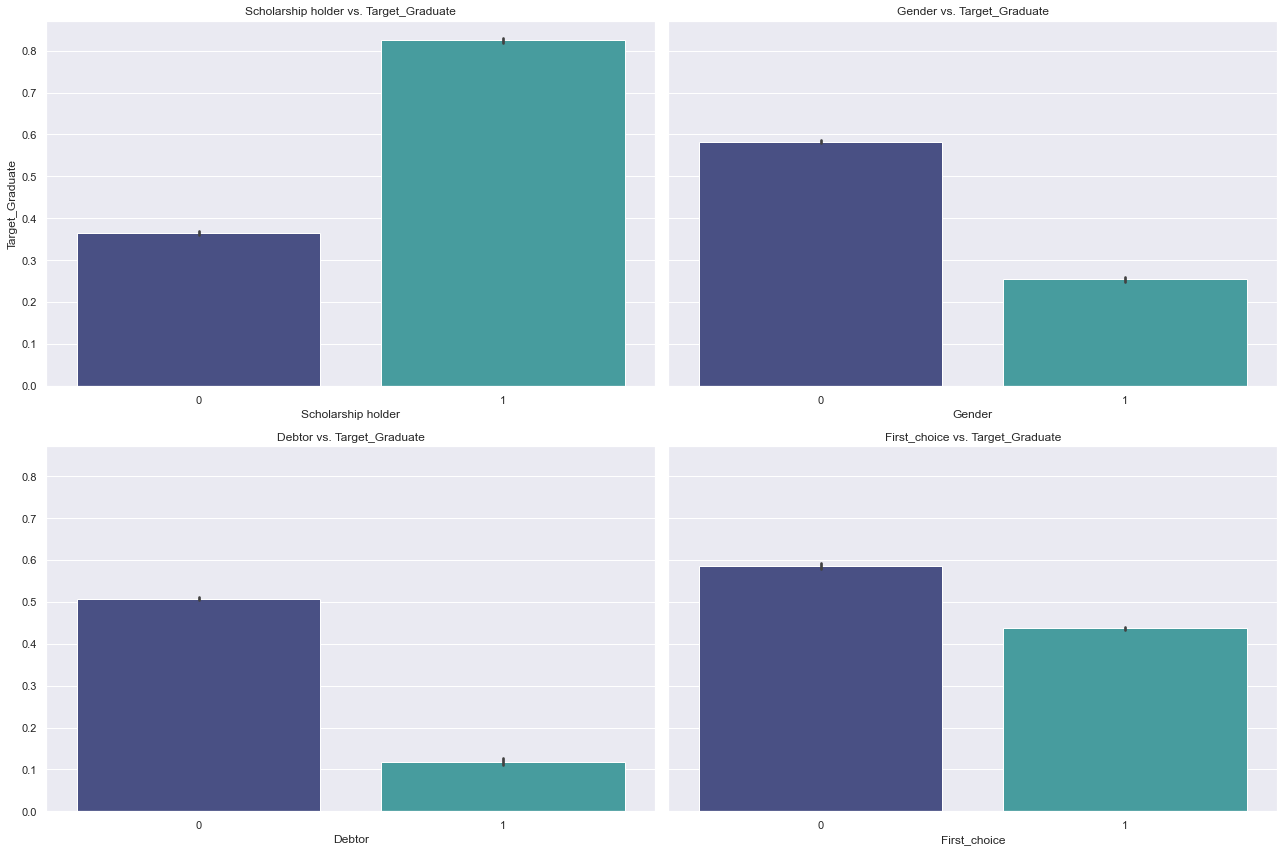

In [13]:
# Erstellen Sie eine Figur und Unterplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=True)

# Plot 1: Scholarship holder vs. Target_Graduate
sns.barplot(x='Scholarship holder', y='Target_Graduate', data=df, palette='mako', ax=axes[0, 0])
axes[0, 0].set_title('Scholarship holder vs. Target_Graduate')

# Plot 2: Gender vs. Target_Graduate
sns.barplot(x='Gender', y='Target_Graduate', data=df, palette='mako', ax=axes[0, 1])
axes[0, 1].set_title('Gender vs. Target_Graduate')
axes[0, 1].set_ylabel('')

# Plot 3: Debtor vs. Target_Graduate
sns.barplot(x='Debtor', y='Target_Graduate', data=df, palette='mako', ax=axes[1, 0])
axes[1, 0].set_title('Debtor vs. Target_Graduate')
axes[1, 0].set_ylabel('')

# Plot 4: First_choice vs. Target_Graduate
sns.barplot(x='First_choice', y='Target_Graduate', data=df, palette='mako', ax=axes[1, 1])
axes[1, 1].set_title('First_choice vs. Target_Graduate')
axes[1, 1].set_ylabel('')

# Layout anpassen
plt.tight_layout()

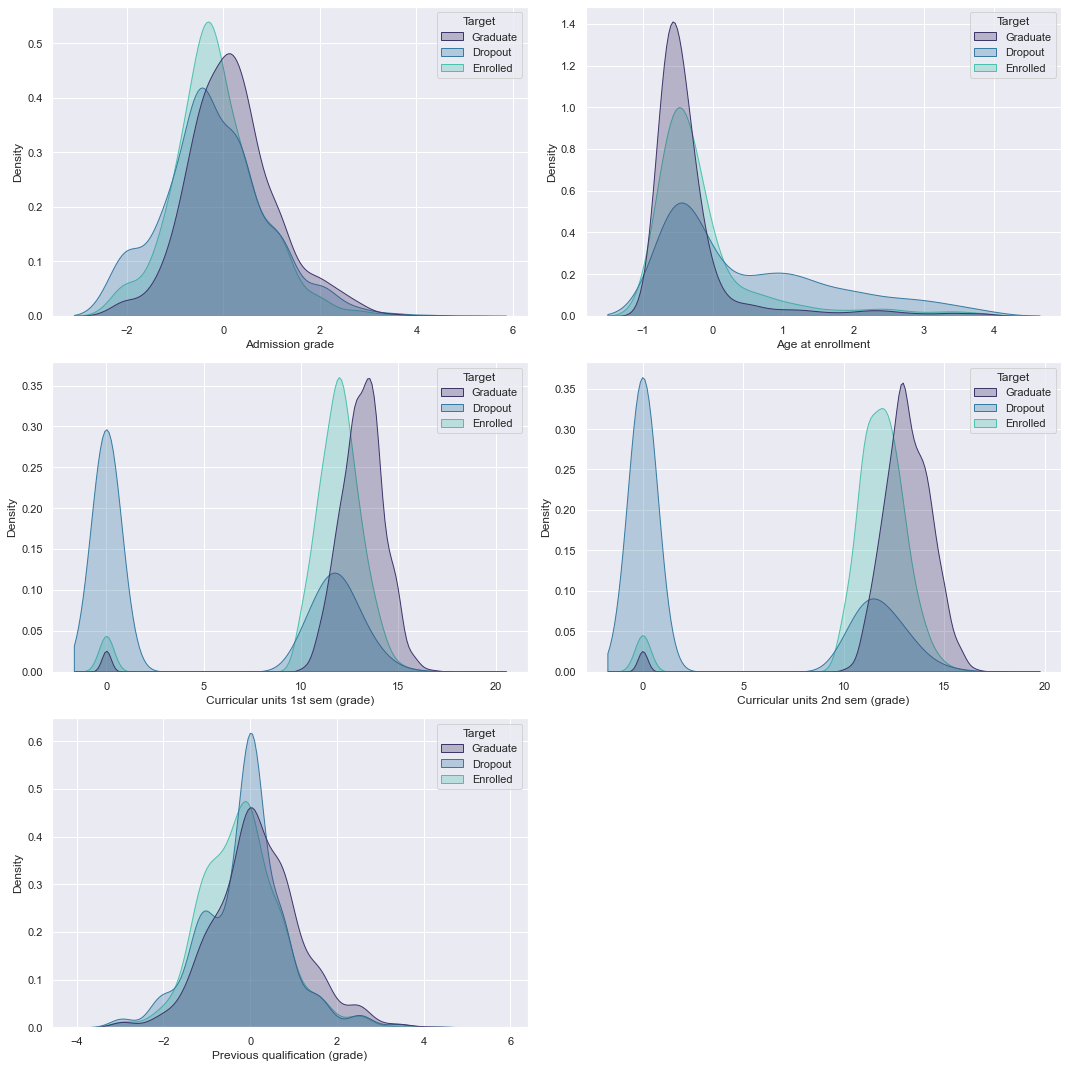

In [14]:
# Erstellen Sie eine Figur und Unterplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Admission grade
sns.kdeplot(data=df, x="Admission grade", hue='Target', bw_adjust=2, cumulative=False,
            common_norm=False, common_grid=True, fill=True, palette="mako",
            alpha=.3, linewidth=1, ax=axes[0, 0])

# Plot 2: Age at enrollment
sns.kdeplot(data=df, x="Age at enrollment", hue='Target', bw_adjust=2, cumulative=False,
            common_norm=False, common_grid=True, fill=True, palette="mako",
            alpha=.3, linewidth=1, ax=axes[0, 1])

# Plot 3: Curricular units 1st sem (grade)
sns.kdeplot(data=df, x="Curricular units 1st sem (grade)", hue='Target', bw_adjust=1,
            cumulative=False, common_norm=False, common_grid=True, fill=True,
            palette="mako", alpha=.3, linewidth=1, ax=axes[1, 0])

# Plot 4: Curricular units 2nd sem (grade)
sns.kdeplot(data=df, x="Curricular units 2nd sem (grade)", hue='Target', bw_adjust=1,
            cumulative=False, common_norm=False, common_grid=True, fill=True,
            palette="mako", alpha=.3, linewidth=1, ax=axes[1, 1])

# Plot 5: Previous qualification (grade)
sns.kdeplot(data=df, x="Previous qualification (grade)", hue='Target', bw_adjust=2,
            cumulative=False, common_norm=False, common_grid=True, fill=True,
            palette="mako", alpha=.3, linewidth=1, ax=axes[2, 0])

# Leeren Plot entfernen
fig.delaxes(axes[2, 1])

# Layout anpassen
plt.tight_layout()

# Anzeige der Plots
plt.show()


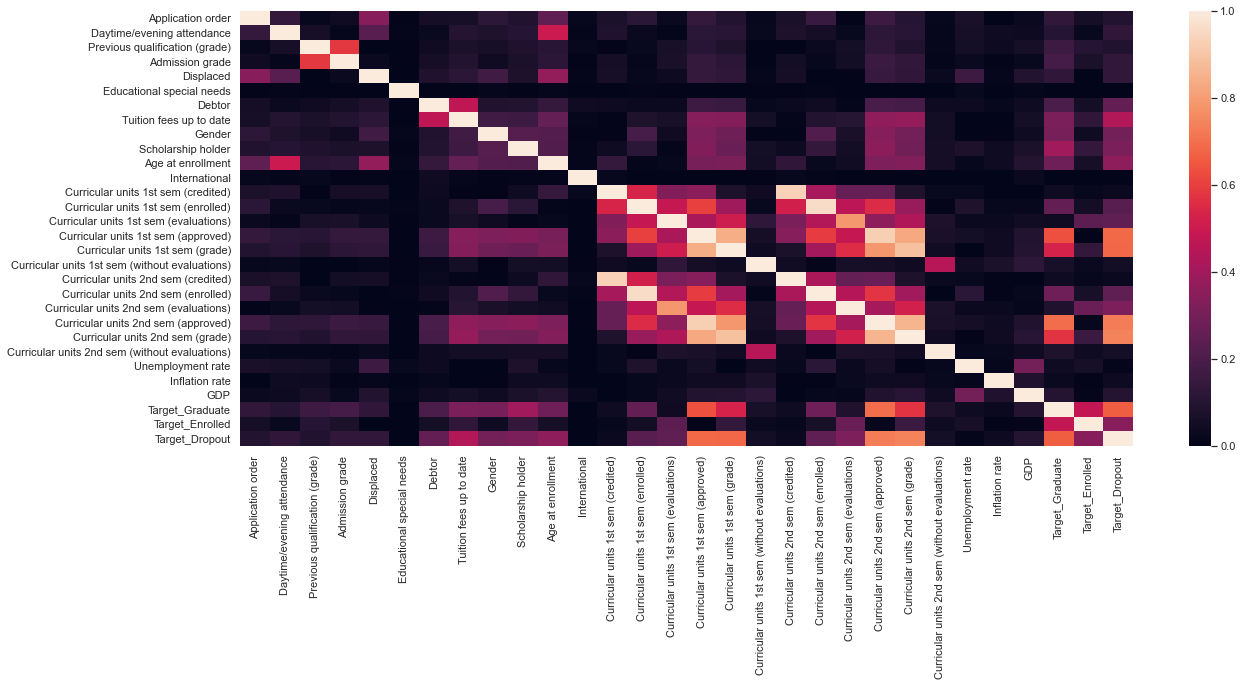

In [15]:
exog=['Application order', 'Daytime/evening attendance', 'Previous qualification (grade)', 'Admission grade',
      'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
      'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
      'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
      'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 
      'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
      'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
      'Inflation rate', 'GDP', 'Target_Graduate', 'Target_Enrolled', 'Target_Dropout']
heatmap = sns.heatmap(abs(df[exog].corr()), vmin=0, vmax=1)


In [16]:
abs(df[exog].corr())[['Target_Graduate', 'Target_Enrolled', 'Target_Dropout']].nlargest(8, columns='Target_Graduate')

,Target_Graduate,Target_Enrolled,Target_Dropout
Target_Graduate,1.000000,0.478196,0.662016
Curricular units 2nd sem (approved),0.695224,0.019509,0.727312
Target_Dropout,0.662016,0.341668,1.000000
Curricular units 1st sem (approved),0.636317,0.007022,0.686916
Curricular units 2nd sem (grade),0.570955,0.152735,0.741322
Curricular units 1st sem (grade),0.527942,0.134510,0.679742
Target_Enrolled,0.478196,1.000000,0.341668
Scholarship holder,0.399936,0.135335,0.312480


In [17]:
abs(df.corr())[['Target_Graduate', 'Target_Enrolled', 'Target_Dropout']].nlargest(25, columns='Target_Graduate')

,Target_Graduate,Target_Enrolled,Target_Dropout
Target_Graduate,1.000000,0.478196,0.662016
Curricular units 2nd sem (approved),0.695224,0.019509,0.727312
Target_Dropout,0.662016,0.341668,1.000000
Curricular units 1st sem (approved),0.636317,0.007022,0.686916
Curricular units 2nd sem (grade),0.570955,0.152735,0.741322
Curricular units 1st sem (grade),0.527942,0.134510,0.679742
Target_Enrolled,0.478196,1.000000,0.341668
Scholarship holder,0.399936,0.135335,0.312480
Tuition fees up to date,0.311355,0.126613,0.441232
Gender,0.304192,0.036311,0.294529
